## Without I-type blocks

In [21]:
!sed -z -i 's/\n#import image_IPP as IPP/\nimport image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP/\n#import image_IPP_adaptive as IPP as IPP/g' RD_curve.py

In [22]:
!head -n 15 RD_curve.py

In [1]:
!python RD_curve.py > /tmp/output

In [2]:
!grep BPP /tmp/output | cut -d ' ' -f 2 > /tmp/BPPs

In [3]:
!cat /tmp/BPPs

0.24147551907968576
0.23328861531986533
0.22723765432098766
0.22148481341189674
0.21690867003367004
0.21218609708193042
0.20861742424242424
0.20538808221099888
0.20245861391694725
0.19996054292929294
0.19797541386083053
0.19652865460157126
0.19490039281705948
0.1935842803030303
0.1920954335016835
0.1918744739057239
0.1906530583613917
0.19013573232323233
0.18939481621773288
0.18906600729517395
0.1888240039281706


In [4]:
!grep Average /tmp/output | grep MSE | cut -d ' ' -f 3 > /tmp/AMSE

In [5]:
!cat /tmp/AMSE

10.982899524761503
12.053593991126542
13.32535138713524
15.046137481586701
17.03821735146605
19.445175386679296
22.681290333894502
25.220179003577435
28.759305950126265
33.11114958175505
37.551702134189114
43.69153547190656
50.452893518518515
57.241263437324626
66.26102737443883
76.46080038667928
86.54504232866863
97.80924851816779
112.75621963997614
126.48899805345114
144.524414172103


In [6]:
!paste /tmp/BPPs /tmp/AMSE > /tmp/curve_no_intrablocks.txt

In [7]:
!cat /tmp/curve_no_intrablocks.txt

0.24147551907968576	10.982899524761503
0.23328861531986533	12.053593991126542
0.22723765432098766	13.32535138713524
0.22148481341189674	15.046137481586701
0.21690867003367004	17.03821735146605
0.21218609708193042	19.445175386679296
0.20861742424242424	22.681290333894502
0.20538808221099888	25.220179003577435
0.20245861391694725	28.759305950126265
0.19996054292929294	33.11114958175505
0.19797541386083053	37.551702134189114
0.19652865460157126	43.69153547190656
0.19490039281705948	50.452893518518515
0.1935842803030303	57.241263437324626
0.1920954335016835	66.26102737443883
0.1918744739057239	76.46080038667928
0.1906530583613917	86.54504232866863
0.19013573232323233	97.80924851816779
0.18939481621773288	112.75621963997614
0.18906600729517395	126.48899805345114
0.1888240039281706	144.524414172103


In [8]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [19]:
!sed -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -i 's/\n#import image_IPP_adaptive as IPP/\nimport image_IPP_adaptive as IPP as IPP/g' RD_curve.py

In [20]:
!head -n 15 RD_curve.py

''' MRVC/image_IPP_RD.py '''

# Generate a RD curve.

import distortion
import frame

# --> Select below the codec. <--
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP

# Original video frames (PNG format) with file-names
# f"{video}_{frame_number:03d}.png".
video = "/tmp/original_"


In [1]:
!python RD_curve.py > /tmp/output

In [2]:
!grep BPP /tmp/output | cut -d ' ' -f 2 > /tmp/BPPs

In [3]:
!cat /tmp/BPPs

0.24147551907968576
0.23328861531986533
0.22723765432098766
0.22148481341189674
0.21690867003367004
0.21218609708193042
0.20861742424242424
0.20538808221099888
0.20245861391694725
0.19996054292929294
0.19797541386083053
0.19652865460157126
0.19490039281705948
0.1935842803030303
0.1920954335016835
0.1918744739057239
0.1906530583613917
0.19013573232323233
0.18939481621773288
0.18906600729517395
0.1888240039281706


In [4]:
!grep Average /tmp/output | grep MSE | cut -d ' ' -f 3 > /tmp/AMSE

In [5]:
!cat /tmp/AMSE

10.982899524761503
12.053593991126542
13.32535138713524
15.046137481586701
17.03821735146605
19.445175386679296
22.681290333894502
25.220179003577435
28.759305950126265
33.11114958175505
37.551702134189114
43.69153547190656
50.452893518518515
57.241263437324626
66.26102737443883
76.46080038667928
86.54504232866863
97.80924851816779
112.75621963997614
126.48899805345114
144.524414172103


In [6]:
!paste /tmp/BPPs /tmp/AMSE > /tmp/curve_witb_intrablocks.txt

In [7]:
!cat /tmp/curve_with_intrablocks.txt

0.24147551907968576	10.982899524761503
0.23328861531986533	12.053593991126542
0.22723765432098766	13.32535138713524
0.22148481341189674	15.046137481586701
0.21690867003367004	17.03821735146605
0.21218609708193042	19.445175386679296
0.20861742424242424	22.681290333894502
0.20538808221099888	25.220179003577435
0.20245861391694725	28.759305950126265
0.19996054292929294	33.11114958175505
0.19797541386083053	37.551702134189114
0.19652865460157126	43.69153547190656
0.19490039281705948	50.452893518518515
0.1935842803030303	57.241263437324626
0.1920954335016835	66.26102737443883
0.1918744739057239	76.46080038667928
0.1906530583613917	86.54504232866863
0.19013573232323233	97.80924851816779
0.18939481621773288	112.75621963997614
0.18906600729517395	126.48899805345114
0.1888240039281706	144.524414172103


In [8]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

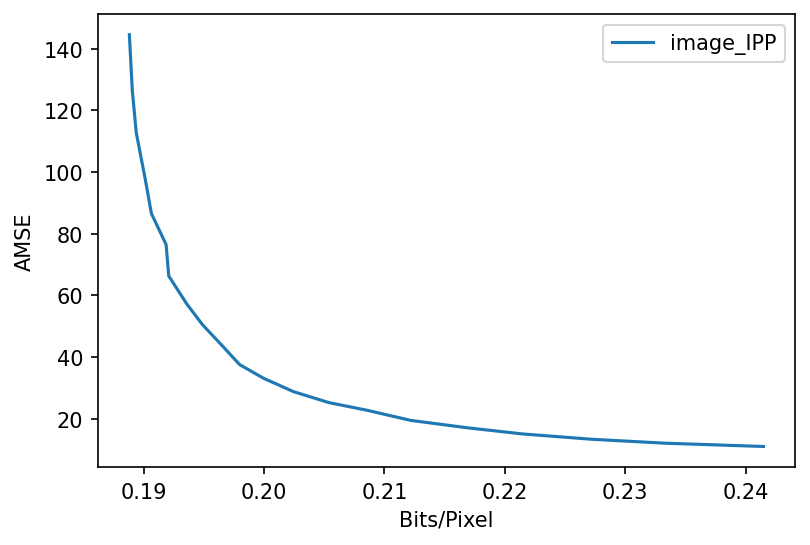

In [9]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points__with_intrablocks), label="With Intra-blocks")
pylab.title("")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()